Author: Thomas Joyce

Class: ASTR 400B - Galaxies and Cosmology

Description: Workbook documenting Homework 5

--------------------------------------------------------------------------------------------------------------------------------

See the submitted GalaxyProfiles python script for further inspection of the class and functions. 

In [1]:
### Importations ###
# Numpy and Astropy
import numpy as np
import astropy.units as u
# Scipy 
import scipy.optimize as sco 
# Plotting
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
# External (must be in same directory as Homework5)
from ReadFile import Read 
from CenterOfMass import CenterOfMass
from GalaxyProfiles import MassProfile

In [2]:
MW = MassProfile("MW", 0)
M31 = MassProfile("M31", 0)
M33 = MassProfile("M33", 0)

R = np.arange(0.1, 30, 1)

# Part 8 #

Plotting the mass profile for each galaxy. 

In [55]:
def MassPlot(GalClass, Radaii, a_guess):
    ''' 
    Description: Plots the mass profile for a certain galaxy class, displaying
    the effects of darkmatter, disk stars, and bulge stars in conjunction with the hernquist profile 
    
    Inputs:
        - GalClass: variable the galaxy calss was assigned to 
        - Radaii: List of points (in kpc) the profile will be evaluated at (NON Astropy Quantity)
        - a_guess: guessing value for the scale radius a for the hernquist profile in kpc (NON Astropy Quantity) 
    '''
    # Figure #
    plt.figure((GalClass.gname + 'Mass Profile'), figsize = (6,6), dpi = 250)
    
    # Plotting (Particle 1)#
    plt.scatter(Radaii, GalClass.MassEnclosed(1, Radaii), marker = 's', s = 80, color = 'black', zorder = 2, label = 'Dark Matter') 
    
    # Plotting (Particle 2)#
    plt.scatter(Radaii, GalClass.MassEnclosed(2, Radaii), marker = '*', s = 80, color = 'dodgerblue', zorder = 2, label = 'Disk Stars') 
    
    # Plotting (Particle 3)#
    if GalClass.gname != 'M33':
        plt.scatter(Radaii, GalClass.MassEnclosed(3, Radaii), marker = '*', s = 80, color = 'orange', zorder = 2, label = 'Bulge Stars')
        
    # Plotting (Total) #
    plt.scatter(Radaii, GalClass.MassEnclosedTotal(Radaii), marker = '.', s = 80, color = 'gray', zorder = 1, label = 'Total Mass') 
    
    # Hernquist Fitting #
    M_halo = GalClass.MassEnclosed(1, [300])[0] / 1e12 # correction factor to proper magnitude
    plt.scatter(Radaii, GalClass.HernquistMass(Radaii, a_guess, M_halo), marker = '+', s = 80, color = 'purple', zorder = 0, label = 'Hernquist Profile')
    
    print('Scale Factor (a): ' + str(a_guess) + ' kpc')
    print('M_halo: ' + f'{(M_halo * 1e12):.2e}')
    
    
    # Plot Formatting #
    plt.xlabel('Galaxy Radius [kpc]', fontsize = 15)
    plt.ylabel('Component Mass [$M_{sun}$]', fontsize = 15)
    plt.title('Mass Profile for ' + GalClass.gname)
    
    plt.semilogy()
    
    plt.xticks(np.arange(0, 35, 2.5))
    plt.grid(axis = 'both', color = 'grey', linewidth = 0.7, linestyle=':')
    
    plt.legend()
    
    plt.tight_layout()
    
    # Plot Saving #
    plt.savefig(GalClass.gname + '_MassProfile') 
### END MassPlot

Scale Factor (a): 55 kpc
M_halo: 1.37e+12 solMass


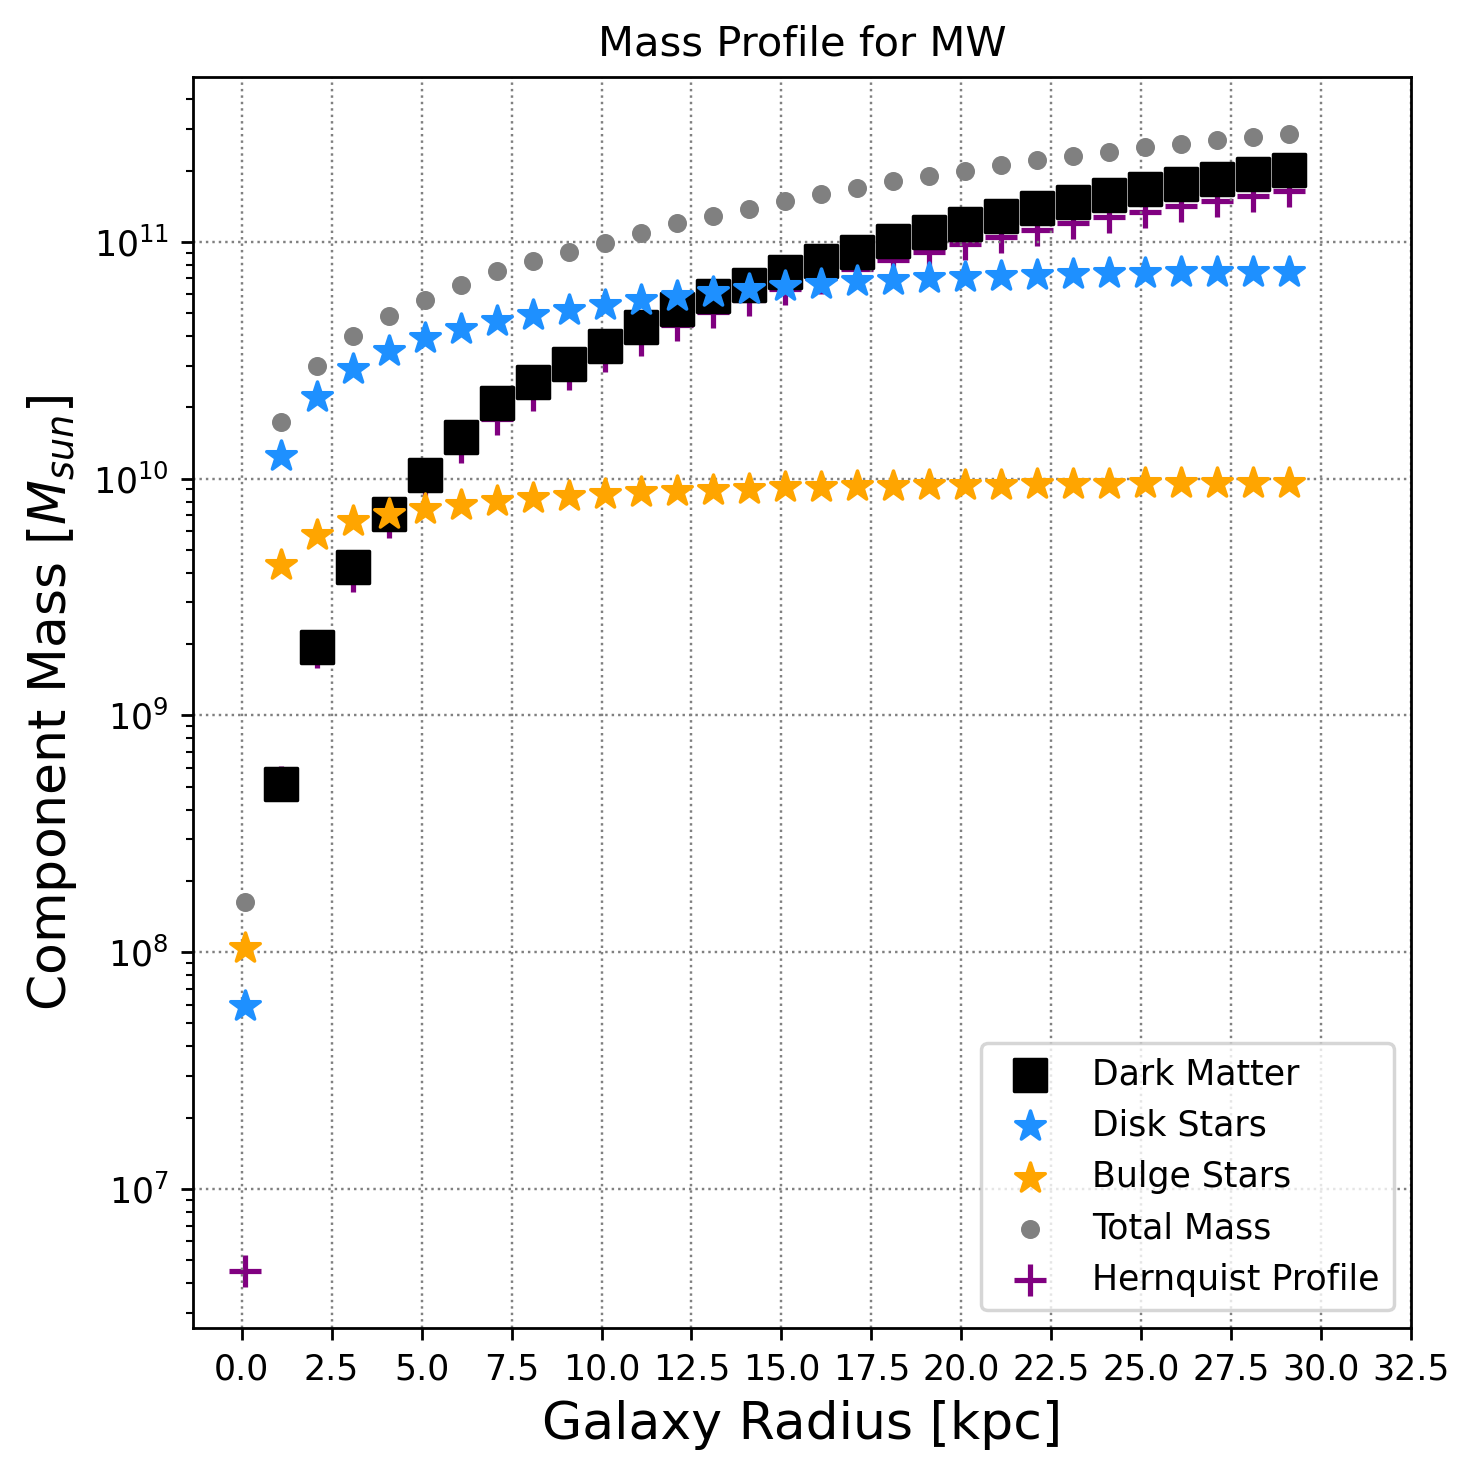

In [73]:
MassPlot(MW, R, 55)

Scale Factor (a): 45 kpc
M_halo: 1.33e+12 solMass


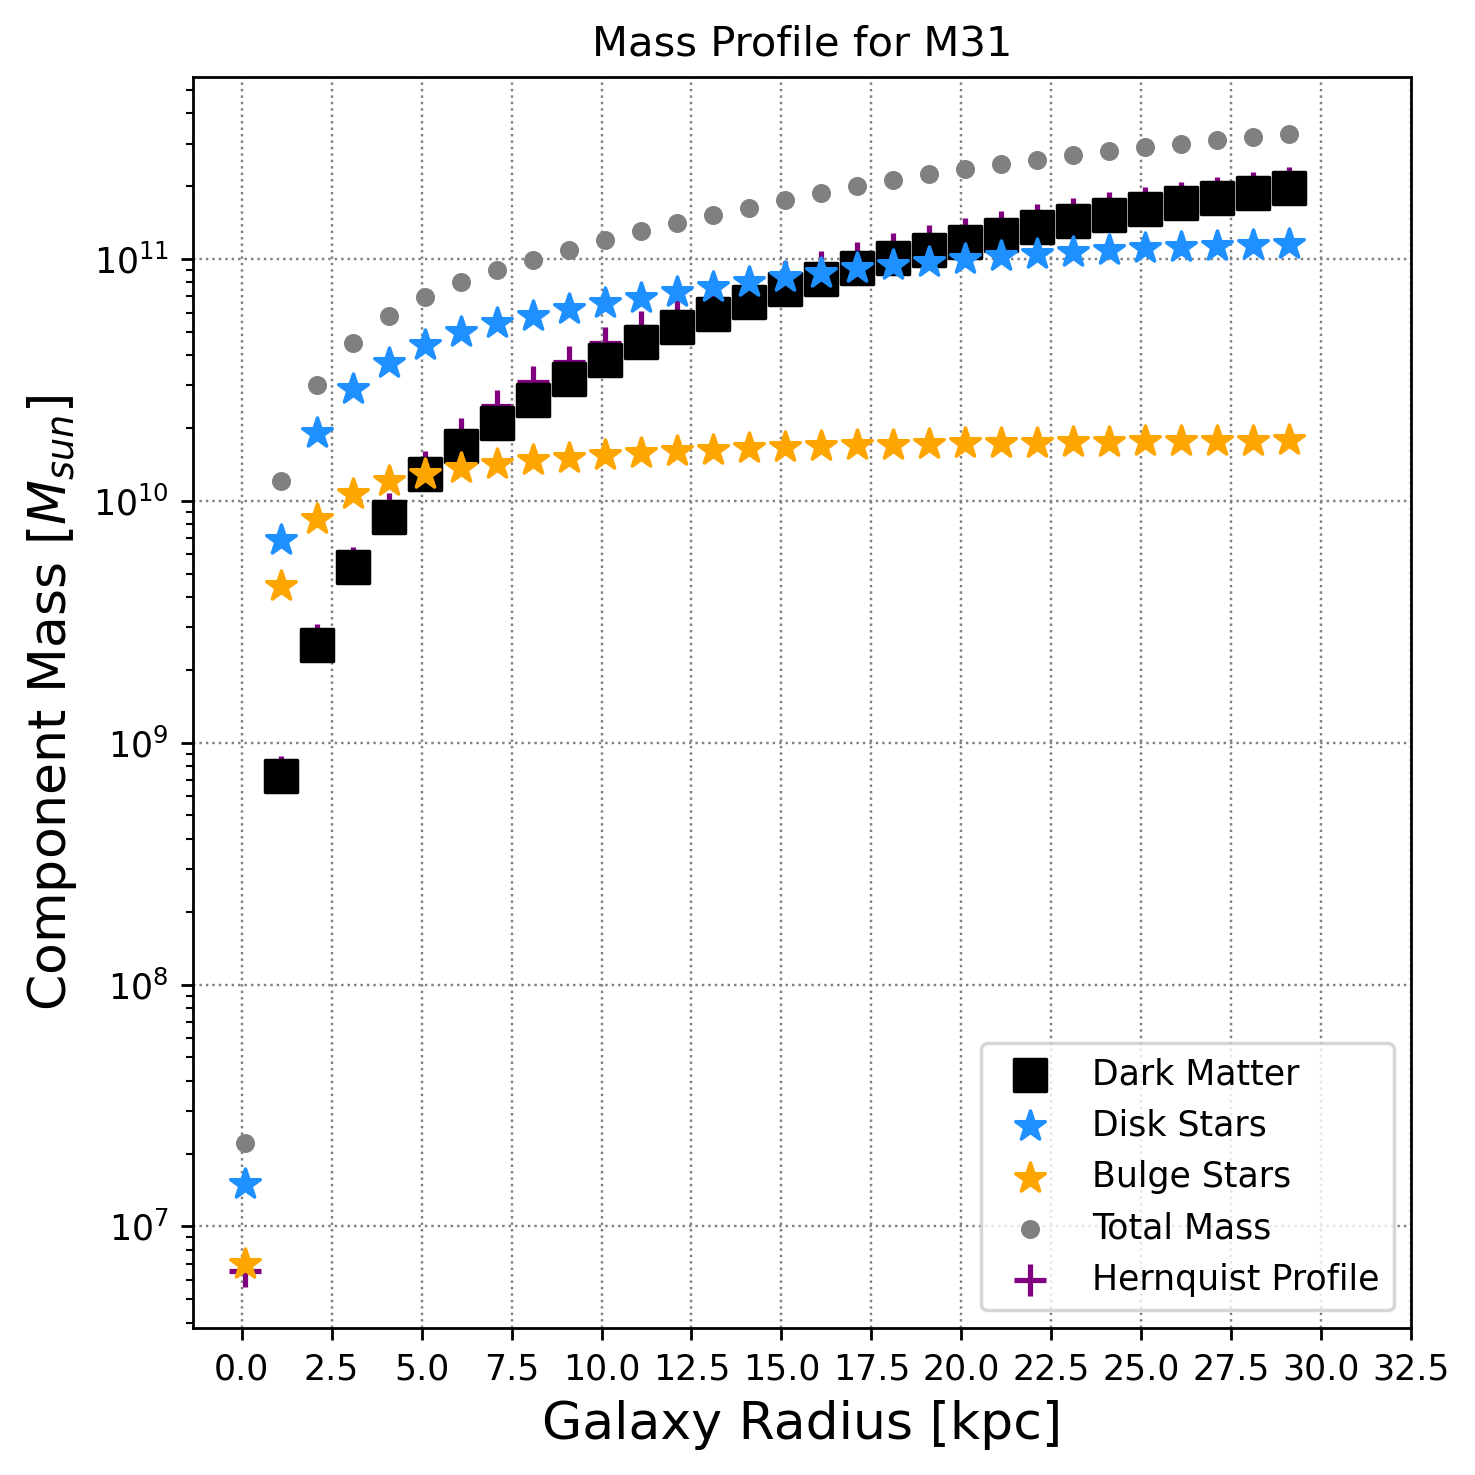

In [71]:
MassPlot(M31, R, 45)

Scale Factor (a): 20 kpc
M_halo: 1.61e+11 solMass


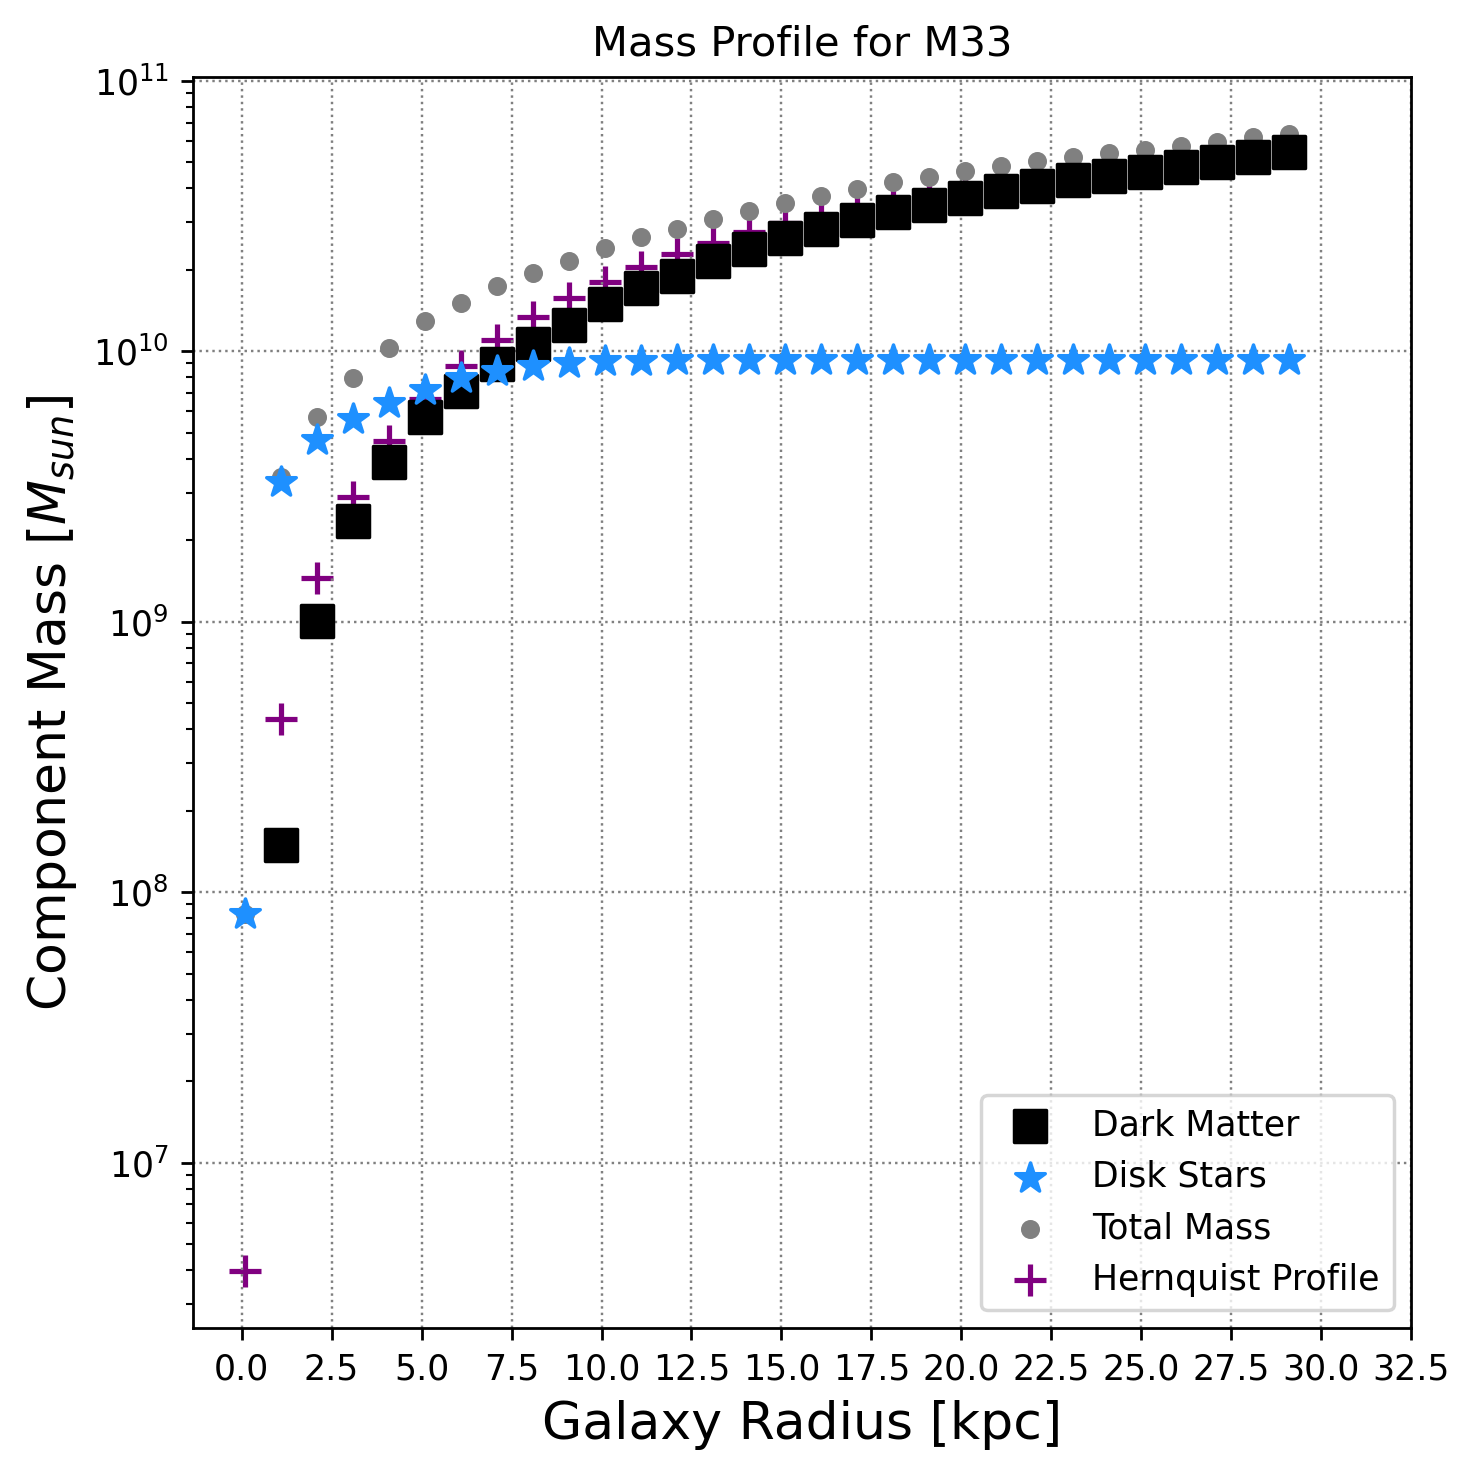

In [74]:
MassPlot(M33, R, 20)

# Part 9 #

Plotting the circular velocity profile for each galaxy.

In [60]:
def RotationPlot(GalClass, Radaii, a_guess):
    ''' 
    Description: Plots the rotation profile for a certain galaxy class, displaying
    the effects of darkmatter, disk stars, and bulge stars in conjunction with the hernquist profile 
    
    Inputs:
        - GalClass: variable the galaxy calss was assigned to 
        - Radaii: List of points (in kpc) the profile will be evaluated at (NON Astropy Quantity)
        - a_guess: guessing value for the scale radius a for the hernquist profile in kpc (NON Astropy Quantity) 
    '''
    # Figure #
    plt.figure((GalClass.gname + 'Rotation Profile'), figsize = (6,6), dpi = 250)
    
    # Plotting (Particle 1)#
    plt.scatter(Radaii, GalClass.CircularVelocity(1, Radaii), marker = 'p', s = 80, color = 'black', zorder = 2, label = 'Dark Matter') 
    
    # Plotting (Particle 2)#
    plt.scatter(Radaii, GalClass.CircularVelocity(2, Radaii), marker = '^', s = 80, color = 'dodgerblue', zorder = 2, label = 'Disk Stars') 
    
    # Plotting (Particle 3)#
    if GalClass.gname != 'M33':
        plt.scatter(Radaii, GalClass.CircularVelocity(3, Radaii), marker = '^', s = 80, color = 'orange', zorder = 2, label = 'Bulge Stars')
        
    # Plotting (Total) #
    plt.scatter(Radaii, GalClass.TotalCircularVelocity(Radaii), marker = 'h', s = 80, color = 'gray', zorder = 1, label = 'Total Mass') 
    
    # Hernquist Fitting #
    M_halo = GalClass.MassEnclosed(1, [300])[0] / 1e12 # correction factor to proper magnitude
    plt.scatter(Radaii, GalClass.HernquistVCirc(Radaii, a_guess, M_halo), marker = 'X', s = 80, color = 'purple', zorder = 0, label = 'Hernquist Profile')
    
    print('Scale Factor (a): ' + str(a_guess) + ' kpc')
    print('M_halo: ' + f'{(M_halo * 1e10):.2e}')
    
    
    # Plot Formatting #
    plt.xlabel('Galaxy Radius [kpc]', fontsize = 15)
    plt.ylabel('Component Circular Velocity [km/s]', fontsize = 15)
    plt.title('Rotation Profile for ' + GalClass.gname)
    
    plt.xticks(np.arange(0, 35, 2.5))
    plt.grid(axis = 'both', color = 'grey', linewidth = 0.7, linestyle=':')
    
    plt.legend()
    
    plt.tight_layout()
    
    # Plot Saving #
    plt.savefig(GalClass.gname + '_RotationProfile') 
### END MassPlot

Scale Factor (a): 55 kpc
M_halo: 1.37e+10 solMass


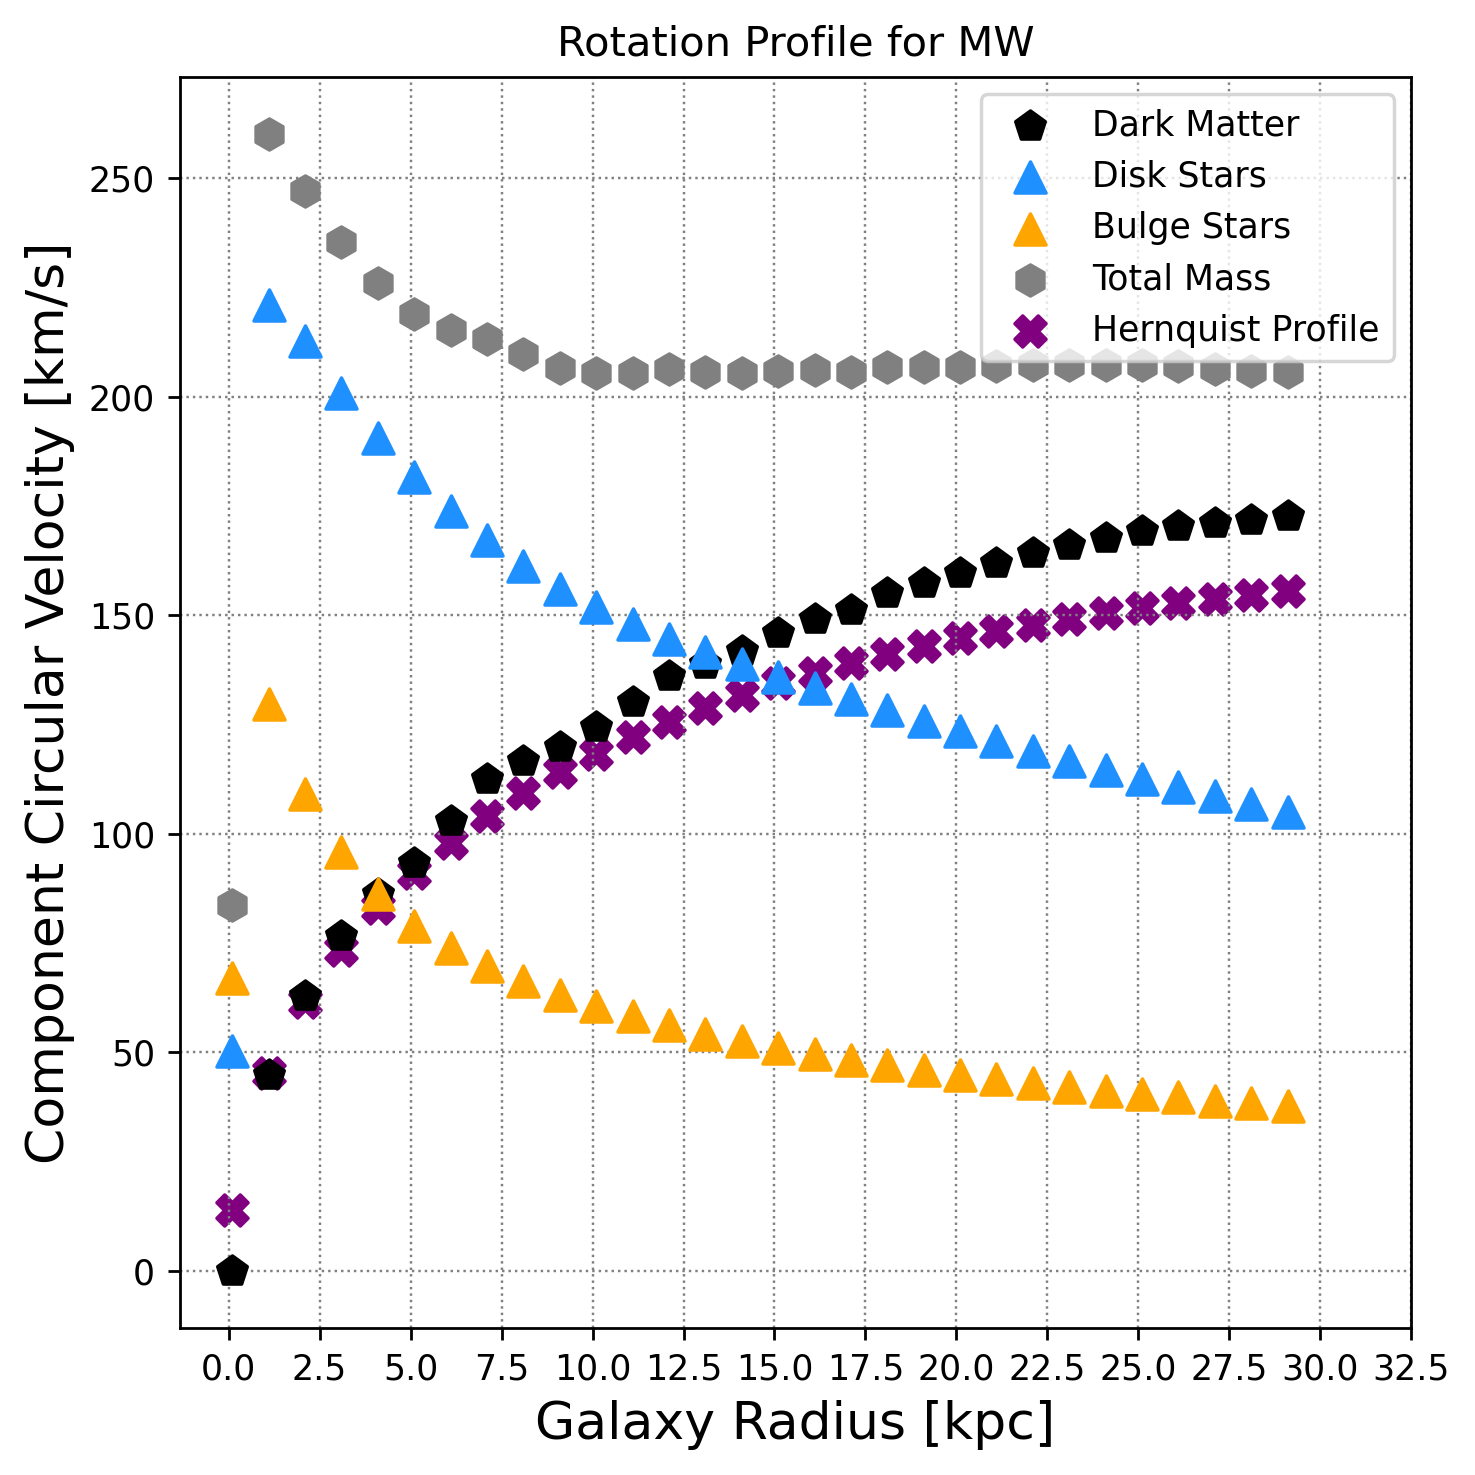

In [75]:
RotationPlot(MW, R, 55)

Scale Factor (a): 45 kpc
M_halo: 1.33e+10 solMass


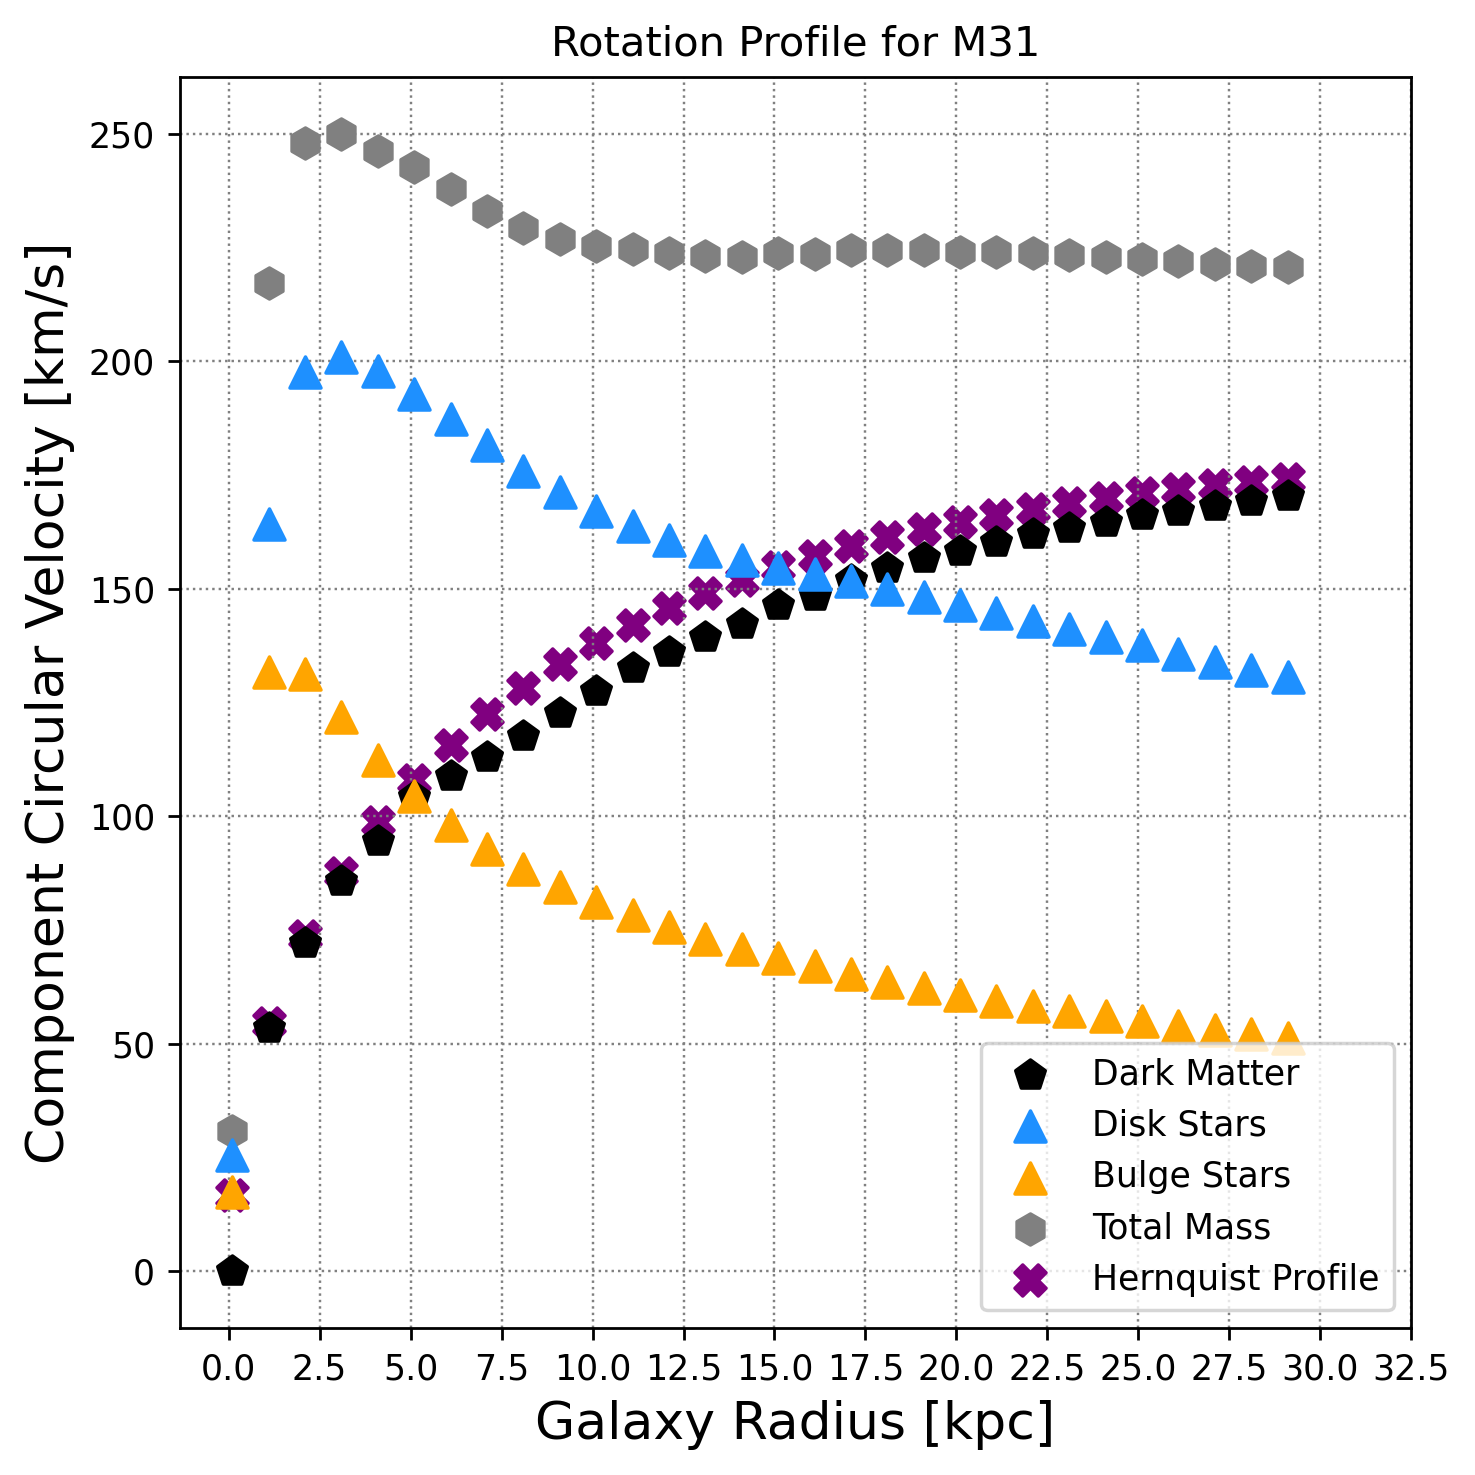

In [76]:
RotationPlot(M31, R, 45)

Scale Factor (a): 20 kpc
M_halo: 1.61e+09 solMass


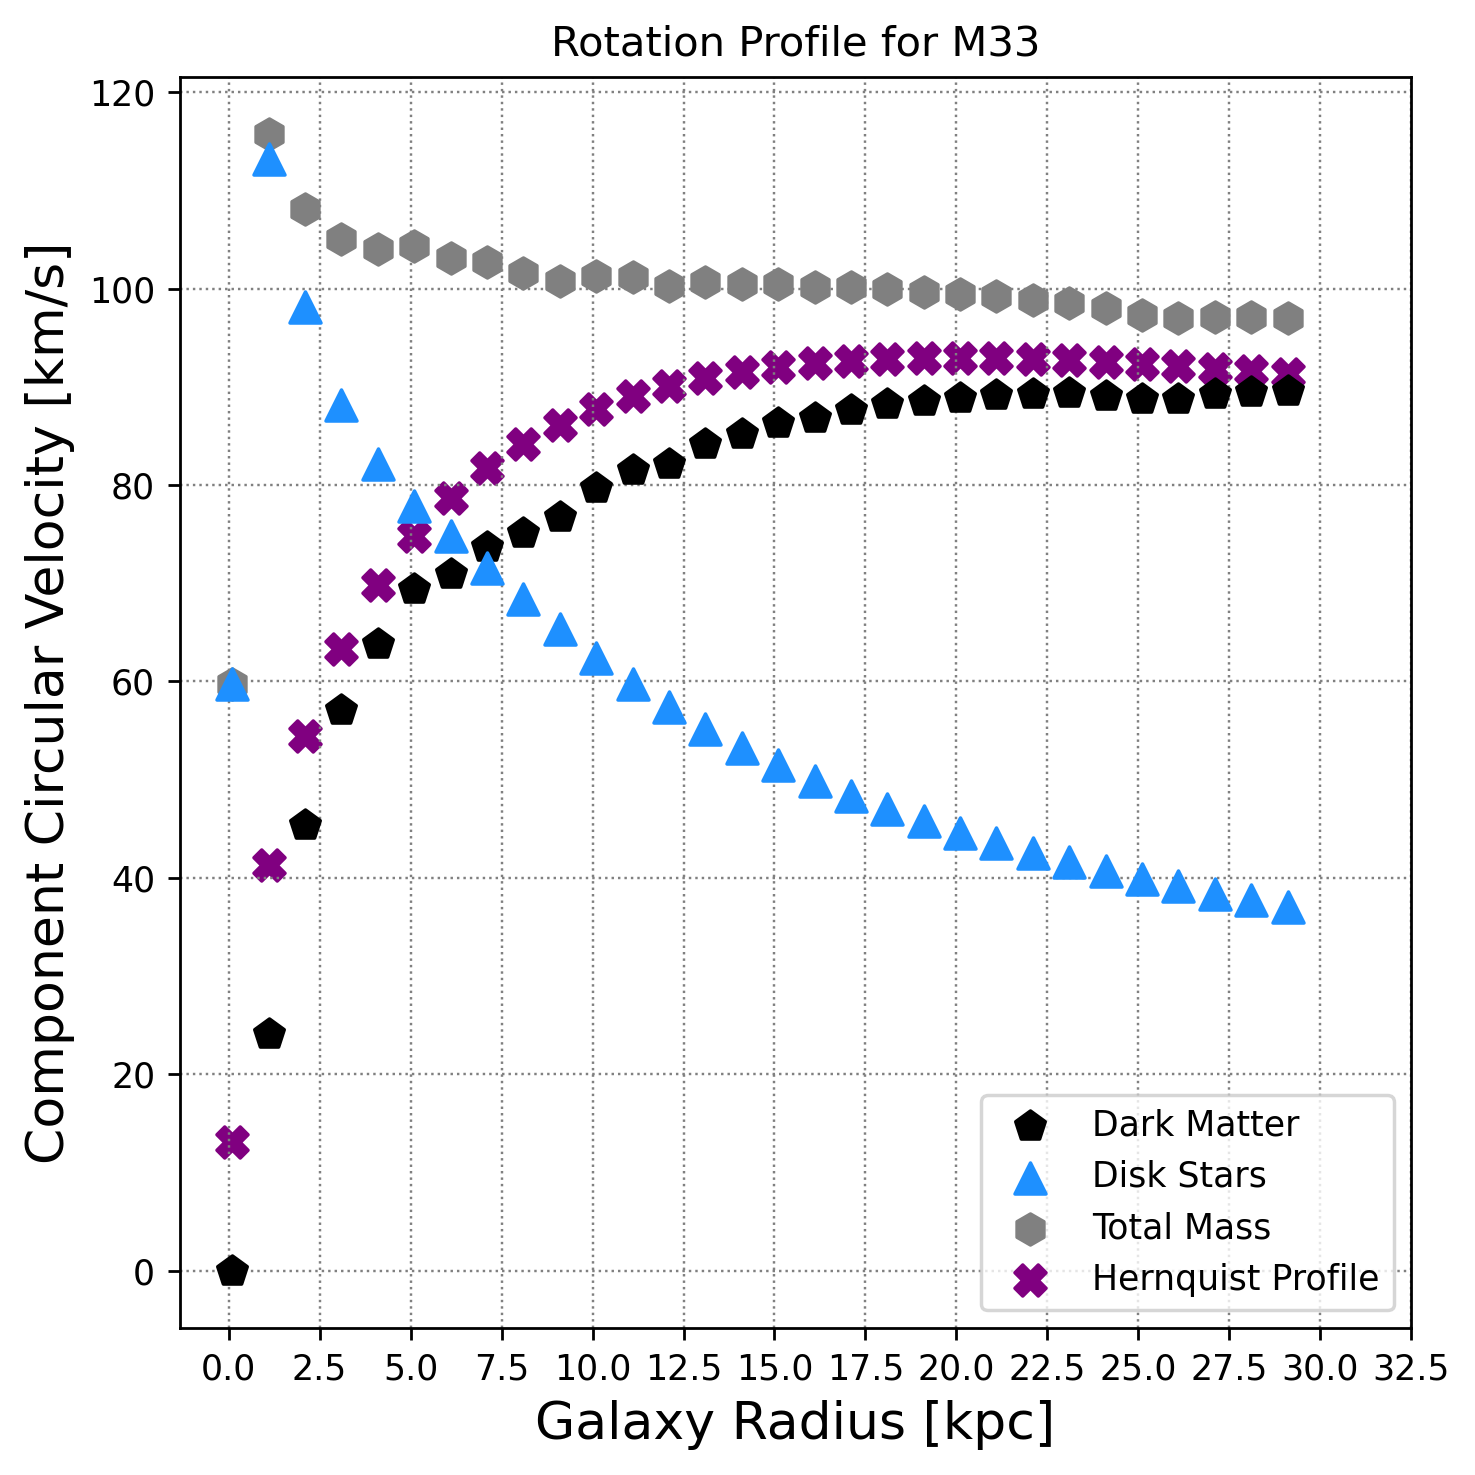

In [77]:
RotationPlot(M33, R, 20)